字符串（String）,符号（Symbol）,数字（Number）三种对象称为原子（atom）<br/><br/>

### <center>系统内建符号的特点：

* 大写的单词开头（Camel命名法）：True、False、FactorInteger、SetAttributes
-判断的函数末尾通常有"Q"：EvenQ、PrimeQ、MatchQ
*人名+符号名：EulerGamma、BesselJ、DiracDelta

命名自定义符号时，应当避开系统内建符号。一种比较好的做法是，在命名自定义符号时将首字母取为小写字母（camel命名法）。

Mathematica除支持可打印的 ASCII 字符外,还支持16 位的 unicode 字符，像 $\pi、\infty$ 等符号或者中文汉字

In [40]:
张三欠我的钱数 = 2000 元;
李四欠我的钱数 = 30000 元;
加 = Plus;
张三和李四总共欠我的钱数 = 张三欠我的钱数~加~李四欠我的钱数

32000 元

In [61]:
Sin["I'm a string!"] /. {"I'm a string!" -> Pi/3}(*较弱的类型系统*)

Sqrt[3]
-------
   2

在 C 或者 Pascal 这种面向过程的结构化程序语言中，条件、循环和子程序是最基本的三种结构。但是，在 Mathematica 程序中，条件和循环结构其实用得并不多。这是因为条件结构的功能基本上可以通过核心语言中的**模式匹配**来完成；而循环结构的功能则可以通过**表处理和泛函编程**完成。它们比条件和循环结构更灵活、更强大、并且更快。

* 简单条件判断

In [64]:
If[True, Print["Then"]]
If[False, Print["Then"], Print["Else"]]
(*If[condition,t,f,u] 如果 condition 既不计算为 True 也不计算为 False 则给出 u.*)

Then
Else


* 多重条件判断

$Which[test_1,value_1,test_2,value_2,...]依次计算每个test_i ，返回相应于产生 True 的第一个value_i 的值.$

In [78]:
x=6;
Which[x == 1,y=1, x == 2, y=2, x == 3, 3, True, Print["x!=1,2,3"]];

x!=1,2,3


-Graphics-
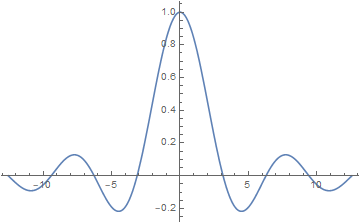

In [80]:
Plot[Piecewise[{{1, x == 0}, {Sin[x]/x, x != 0}}], {x, -4 Pi, 4 Pi}]

$Piecewise[\{\{val_1,cond_1\},\{val_2,cond_2\},...\}]$

利用 <u>esc</u>pw<u>esc</u> 来输入{，然后是 <u>ctrl</u> **comma**，接着使用输入<u>ctrl</u> **enter**其他分支情况

In [82]:
Switch[b, True, 1, False, 0, _, Print["b is not a boolean value!"]]

b is not a boolean value!


$Switch[expr,form_1,value_1,form_2,value_2,...]$

这个也是**模式匹配**的经典语法示例,计算$expr$,与$form_i$比较,匹配则返回$value_i$

* 简单循环

In [95]:
Do[Print["hello,"], {3}]; Print["cute mouse!"];
Do[Print[Prime[i]], {i, PrimePi[100]}];
Do[Print[i, " is a prime number."], {i, {2, 3, 5, 7, 11}}];

hello,
hello,
hello,
cute mouse!
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
2 is a prime number.
3 is a prime number.
5 is a prime number.
7 is a prime number.
11 is a prime number.


* 复杂循环

In [105]:
For[i = 1; t = i, i <= 10, i++, Print[t *= i]];

1
2
6
24
120
720
5040
40320
362880
3628800


In [106]:
n = 1234567; While[Not[PrimeQ[++n]]]; n

1234577

In [107]:
n = 1234567; Catch[Do[If[PrimeQ[i], Throw[i]], {i, n, 2 n}]]

1234577

* 不推荐使用的：Break、Continue、Return、Goto。

* 函数定义方法一：模式匹配+延迟赋值

In [108]:
f[x_] := x^2;
f[x_, y_] := x y;

* 函数定义方法二：纯函数（$\lambda$-表达式、匿名函数）

In [110]:
f1 = Function[x, x^2];(* 完整形式 *)
f2 = #^2 &; (* 简写形式 *)
g1 = Function[{x, y}, x y];
g2 = #1 #2 &;

$eg.$求不大于给定正整数$n$的所有素数的和(条件结构与模式匹配)

In [114]:
myPrimeQ = Function[x, i = 2; max = Floor[Sqrt[x]] + 1;
   While[Mod[x, i] != 0 && i < max, i++]; Not[i < max]];

myPrimeSum = Function[n,
   sum = 0; Do[If[myPrimeQ[x], sum += x], {x, 2, n}]; sum];
(*条件结构*)

In [116]:
myPrimeSum2 = Plus @@ Prime /@ Range@PrimePi[#] &;
(*核心语言|Mathematica内部储存着前10亿个素数的素数表*)

完全运用内置函数,Plus @@可看作$\sum$,PrimePi[#]判断素数个数,Prime[#]列举第#个素数

In [118]:
Timing[#[100000]] & /@ {myPrimeSum, myPrimeSum2}
(*计算时间*)

{{4.32813, 454396537}, {0., 454396537}}